# **Librerías**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import time
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

# **Cargar el dataset**

In [2]:
data = pd.read_csv('Banana_Ripeness_Dataset.csv')

df = pd.DataFrame(data)

df.head(15)

,SampleID,R,G,B,view,class
0,1,128.387045,148.385068,88.125925,front,light green
1,2,91.396778,114.322955,48.277243,front,green
2,3,87.804595,112.774147,50.034383,front,green
3,4,81.901377,103.886640,37.110752,front,light green
4,5,94.311041,120.103604,56.237598,front,green
5,6,76.520608,102.599004,41.981733,front,light green
6,7,93.302772,116.598634,53.715915,front,green
7,8,89.898268,109.027225,52.059142,front,light green
8,9,86.832690,113.458006,49.634117,front,light green
9,10,89.010214,113.309468,52.686793,front,light green


# **Verificar y limpiar de datos**

In [3]:
df = df.drop(['view', 'SampleID'], axis=1)
df.head(15)

,R,G,B,class
0,128.387045,148.385068,88.125925,light green
1,91.396778,114.322955,48.277243,green
2,87.804595,112.774147,50.034383,green
3,81.901377,103.886640,37.110752,light green
4,94.311041,120.103604,56.237598,green
5,76.520608,102.599004,41.981733,light green
6,93.302772,116.598634,53.715915,green
7,89.898268,109.027225,52.059142,light green
8,86.832690,113.458006,49.634117,light green
9,89.010214,113.309468,52.686793,light green


# **Identificar X y Y**

In [4]:
x= df.drop(['class'], axis=1)
y= df['class']

# **Ingeniería de características**

### **Label Encoding**

In [5]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
Y = pd.DataFrame(integer_encoded, columns=["class"])
Y.head(15)

,class
0,1
1,0
2,0
3,1
4,0
5,1
6,0
7,1
8,1
9,1


### **Normalización**

In [6]:
scaler_mean = StandardScaler(with_mean=True, with_std=False)


scaler_minmax = RobustScaler(with_centering=False,
                             with_scaling=True,
                             quantile_range=(0, 100))
scaler_mean.fit(x)
scaler_minmax.fit(x.values)

# transform train and test sets
X_scaled = scaler_minmax.transform(scaler_mean.transform(x))

In [7]:
X_scaled = pd.DataFrame(X_scaled, columns=x.columns)

In [8]:
np.round(x.describe(), 1)

,R,G,B
count,1164.0,1164.0,1164.0
mean,80.9,101.8,45.1
std,17.5,16.6,14.1
min,29.3,50.5,9.0
25%,68.7,90.8,35.0
50%,81.0,102.7,44.2
75%,92.7,113.7,54.6
max,136.6,155.4,98.8


In [9]:
np.round(X_scaled.describe(), 1)

,R,G,B
count,1164.0,1164.0,1164.0
mean,-0.0,-0.0,0.0
std,0.2,0.2,0.2
min,-0.5,-0.5,-0.4
25%,-0.1,-0.1,-0.1
50%,0.0,0.0,-0.0
75%,0.1,0.1,0.1
max,0.5,0.5,0.6


# **Training and Testing**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y.values.reshape(-1,1),
                                        test_size   = 0.2,
                                        random_state = 1234,
                                        shuffle      = True)

X_train.shape, X_test.shape

((931, 3), (233, 3))

# **SVM Model**

In [11]:
poly = svm.SVC(decision_function_shape='ovo',kernel='poly', degree=3, C=1000).fit(X_train, y_train.ravel())

In [12]:
poly_pred = poly.predict(X_test)

# **Model Evaluation**

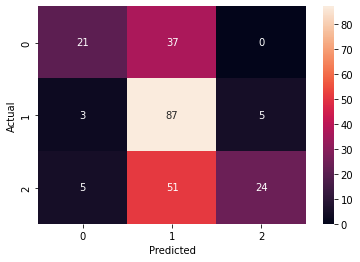

In [13]:
confMatrix = confusion_matrix(y_test, poly_pred)

ax = sn.heatmap(confMatrix , annot=True)

ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.show()

In [14]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_precision = precision_score(y_test, poly_pred, average='weighted')
poly_recall = recall_score(y_test, poly_pred, average='weighted')
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
print('Precision (Polynomial Kernel): ', "%.2f" % (poly_precision*100))
print('Recall (Polynomial Kernel): ', "%.2f" % (poly_recall*100))

Accuracy (Polynomial Kernel):  56.65
F1 (Polynomial Kernel):  53.41
Precision (Polynomial Kernel):  66.71
Recall (Polynomial Kernel):  56.65
